In [1]:
#There are two components to running a Monte Carlo simulations:
#the equation to evaluate
#the random variables for the input

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
#减半之后，币价按当前均值的1.5倍计算，运行200天，标准差保持不变
avg = 14006
std_dtv =310.013
num_reps = 200
num_simulations = 1000

In [4]:
btc_price= np.random.normal(avg,std_dtv,num_reps).round(2)

In [5]:
btc_price[0:200]
print(len(btc_price))

200


In [6]:
#难度减半，之后难度按4%递增
daily_output_summary = []
daily_output=1.2756230374571436e-05/2

for day in range(200):
    if (day) % 14 == 0:
        daily_output = daily_output * 0.96
    daily_output_summary.append(daily_output)

In [7]:
Daily_output_btc=daily_output_summary
print(len(Daily_output_btc))

200


In [8]:
df = pd.DataFrame(index=range(num_reps),data={'Btc_price':btc_price,
                                             'Daily_output':Daily_output_btc})
df['Revenu']=df['Btc_price']*df['Daily_output']

In [9]:
Revenu = df['Btc_price']*df['Daily_output']

In [10]:
df.head()

,Btc_price,Daily_output,Revenu
0,13749.93,0.000006,0.084191
1,13612.02,0.000006,0.083346
2,13809.93,0.000006,0.084558
3,14318.88,0.000006,0.087674
4,14371.60,0.000006,0.087997


In [11]:
df.tail()

,Btc_price,Daily_output,Revenu
195,13826.21,0.000004,0.049796
196,14294.27,0.000003,0.049422
197,14038.66,0.000003,0.048539
198,13919.07,0.000003,0.048125
199,14030.56,0.000003,0.048511


In [12]:
#Cloud mining pricing
cloud_price = df['Revenu']*300
df = pd.DataFrame(index=range(num_reps),data={'Btc_price':btc_price,
                                             'Daily_output':daily_output_summary,
                                             'Cloud_price':cloud_price})

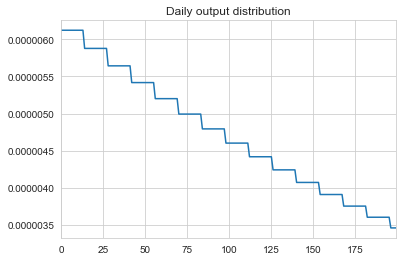

In [13]:
df['Daily_output'].plot(kind='line',title='Daily output distribution')

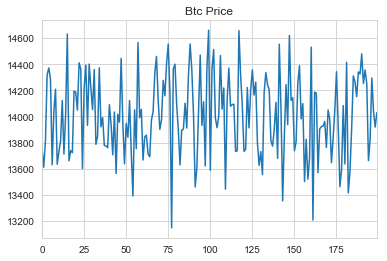

In [14]:
df['Btc_price'].plot(kind='line',title='Btc Price')

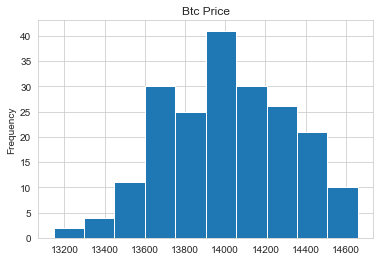

In [15]:
df['Btc_price'].plot(kind='hist',title='Btc Price')

In [16]:
reimbursement_s = []

for day in range(200):
    if day <= 120:
        reimbursement  = 0
    if day> 120:
        reimbursement = cloud_price[day-120]*0.5

    reimbursement_s.append(reimbursement)

In [17]:
df = pd.DataFrame(index=range(num_reps),data={'Btc_price':btc_price,
                                             'Daily_output':daily_output_summary,
                                              'Revenue':Revenu,
                                             'Cloud_price':cloud_price,
                                             'reimbursement':reimbursement_s})

In [18]:
df[1:122:120]

,Btc_price,Daily_output,Revenue,Cloud_price,reimbursement
1,13612.02,0.000006,0.083346,25.003881,0.000000
121,13748.40,0.000004,0.060728,18.218259,12.501941


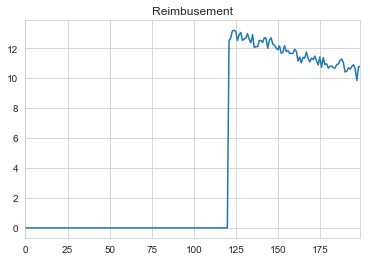

In [19]:
df['reimbursement'].plot(kind='line',title='Reimbusement')

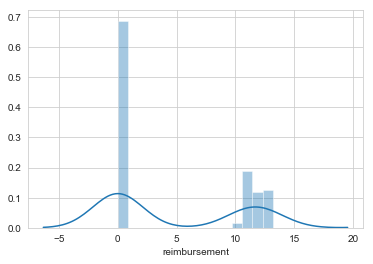

In [20]:
sns.distplot(df['reimbursement'],bins=15)

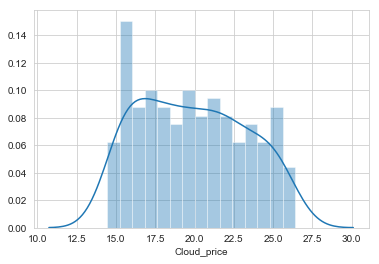

In [21]:
sns.distplot(df['Cloud_price'],bins=15)

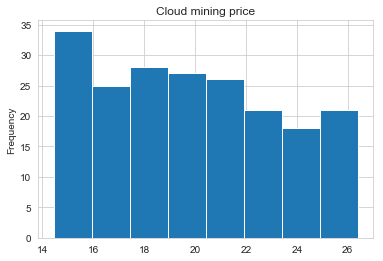

In [22]:
df['Cloud_price'].plot(kind='hist',bins=8,title='Cloud mining price')

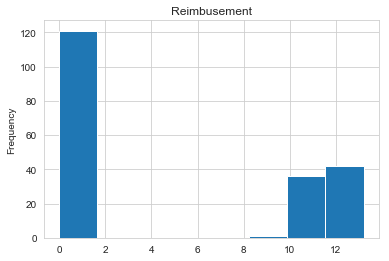

In [23]:
df['reimbursement'].plot(kind='hist',bins=8,title='Reimbusement')

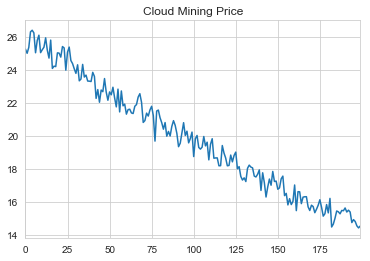

In [24]:
df['Cloud_price'].plot(kind='line',title='Cloud Mining Price')

In [25]:
#percentile list
perc = [.10,.25,.50,.75,.80,.95,.99]
include = ['object','float','int']
df.describe(percentiles=perc,include=include).style.format('{:,}')

,Btc_price,Daily_output,Revenue,Cloud_price,reimbursement
count,200.0,200.0,200.0,200.0,200.0
mean,"14,009.139449999991",4.733776900713935e-06,0.06631447246906692,19.89434174072008,4.616020772103552
std,306.1143116897739,7.964356052143153e-07,0.01122724642456786,3.3681739273703575,5.749513625115137
min,"13,146.41",3.457489372211597e-06,0.048125036596069266,14.43751097882078,0.0
10%,"13,625.243999999999",3.751616072278209e-06,0.05163215236319252,15.489645708957754,0.0
25%,"13,770.5",4.070763967315766e-06,0.056643316899269824,16.99299506978095,0.0
50%,"14,017.295",4.601105829666438e-06,0.06587384304670155,19.762152914010464,0.0
75%,"14,245.625",5.417230193604879e-06,0.07554266561142325,22.662799683426982,11.292483543448668
80%,"14,314.96",5.642948118338416e-06,0.07775821118754153,23.32746335626246,11.659479152429249
95%,"14,480.9295",6.1229905797942885e-06,0.08455907240657834,25.3677217219735,12.68386086098675


**Creat a Loop**

In [26]:
#define a list to keep all the results from each simulation that we want to analyze
all_stats = []

#Loop through many simulations
for i in range(num_simulations):
    
    #Choose random inputs for the sales targets and percent to target
    btc_price=np.random.normal(avg,std_dtv,num_reps).round(2)
    
    #Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(data={'Btc_price':btc_price})
    
    #Back into the daily output using the formule
    daily_output_summary = []
    daily_output=1.2756230374571436e-05/2
    for day in range(200):
        if day % 14 == 0:
            daily_output = daily_output * 0.96
        
        daily_output_summary.append(daily_output)
    
    df['Daily_output']=daily_output_summary
    
    #Determine the Revenu and Cloud_price and calculate it
    df['Revenu']=df['Btc_price']*df['Daily_output']
    df['Cloud_price']=df['Revenu']*300
    
    #Determine the Reimbusement and calculate it
    reimbursement_s = []

    for day in range(200):
        if day <= 120:
            reimbursement  = 0
        if day> 120:
            reimbursement = cloud_price[day-120]*0.5

        reimbursement_s.append(reimbursement)
    df['Reimbursement']=reimbursement_s
    
    #We want to track btc price, daily output, cloud mining price and reimbursement over all the simulations
    all_stats.append([df['Btc_price'].max().round(2),
                     df['Daily_output'].max().round(8),
                     df['Cloud_price'].min().round(2),
                     df['Revenu'].min().round(8),
                     df['Reimbursement'].max().round(8)])

In [27]:
result_df = pd.DataFrame.from_records(all_stats,columns=['Btc_price',
                                                        'Daily_output',
                                                        'Cloud_price',
                                                         'Revenu',
                                                        'Reimbursement'])

In [28]:
result_df.head()

,Btc_price,Daily_output,Cloud_price,Revenu,Reimbursement
0,15029.82,0.000006,14.53,0.048442,13.199576
1,14822.73,0.000006,14.40,0.048015,13.199576
2,14866.79,0.000006,14.54,0.048478,13.199576
3,14865.46,0.000006,14.13,0.047098,13.199576
4,14693.40,0.000006,14.14,0.047149,13.199576


In [29]:
result_df.tail()

,Btc_price,Daily_output,Cloud_price,Revenu,Reimbursement
995,14880.08,0.000006,14.03,0.046757,13.199576
996,14889.78,0.000006,14.19,0.047316,13.199576
997,14684.66,0.000006,14.34,0.047812,13.199576
998,15100.28,0.000006,13.82,0.046070,13.199576
999,14902.68,0.000006,14.02,0.046731,13.199576


In [30]:
result_df['Reimbursement']

0      13.199576
1      13.199576
2      13.199576
3      13.199576
4      13.199576
5      13.199576
6      13.199576
7      13.199576
8      13.199576
9      13.199576
10     13.199576
11     13.199576
12     13.199576
13     13.199576
14     13.199576
15     13.199576
16     13.199576
17     13.199576
18     13.199576
19     13.199576
20     13.199576
21     13.199576
22     13.199576
23     13.199576
24     13.199576
25     13.199576
26     13.199576
27     13.199576
28     13.199576
29     13.199576
         ...    
970    13.199576
971    13.199576
972    13.199576
973    13.199576
974    13.199576
975    13.199576
976    13.199576
977    13.199576
978    13.199576
979    13.199576
980    13.199576
981    13.199576
982    13.199576
983    13.199576
984    13.199576
985    13.199576
986    13.199576
987    13.199576
988    13.199576
989    13.199576
990    13.199576
991    13.199576
992    13.199576
993    13.199576
994    13.199576
995    13.199576
996    13.199576
997    13.1995

In [31]:
result_df.tail()

,Btc_price,Daily_output,Cloud_price,Revenu,Reimbursement
995,14880.08,0.000006,14.03,0.046757,13.199576
996,14889.78,0.000006,14.19,0.047316,13.199576
997,14684.66,0.000006,14.34,0.047812,13.199576
998,15100.28,0.000006,13.82,0.046070,13.199576
999,14902.68,0.000006,14.02,0.046731,13.199576


In [32]:
result_df.describe(percentiles=perc,include=include)

,Btc_price,Daily_output,Cloud_price,Revenu,Reimbursement
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1.000000e+03
mean,14859.171440,6.120000e-06,14.186290,0.047288,1.319958e+01
std,121.249191,6.779654e-20,0.214882,0.000717,1.404024e-13
min,14566.780000,6.120000e-06,13.340000,0.044453,1.319958e+01
10%,14711.269000,6.120000e-06,13.919000,0.046384,1.319958e+01
25%,14771.922500,6.120000e-06,14.030000,0.046779,1.319958e+01
50%,14846.600000,6.120000e-06,14.200000,0.047337,1.319958e+01
75%,14927.397500,6.120000e-06,14.340000,0.047801,1.319958e+01
80%,14949.708000,6.120000e-06,14.370000,0.047900,1.319958e+01
95%,15076.840500,6.120000e-06,14.520000,0.048398,1.319958e+01


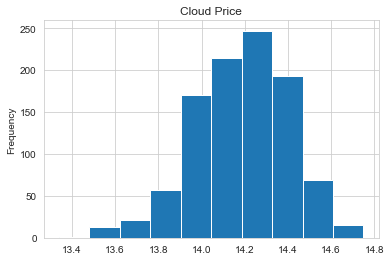

In [33]:
result_df['Cloud_price'].plot(kind='Hist',title='Cloud Price')

In [34]:
result_df

,Btc_price,Daily_output,Cloud_price,Revenu,Reimbursement
0,15029.82,0.000006,14.53,0.048442,13.199576
1,14822.73,0.000006,14.40,0.048015,13.199576
2,14866.79,0.000006,14.54,0.048478,13.199576
3,14865.46,0.000006,14.13,0.047098,13.199576
4,14693.40,0.000006,14.14,0.047149,13.199576
5,14956.43,0.000006,14.02,0.046743,13.199576
6,14786.22,0.000006,14.10,0.046995,13.199576
7,15027.70,0.000006,14.58,0.048597,13.199576
8,14953.39,0.000006,14.39,0.047969,13.199576
9,14765.26,0.000006,13.59,0.045299,13.199576


In [35]:
#result_df.to_excel(excel_writer = r"C:\Users\ding_\Desktop\云算力结果分段1.xlsx")

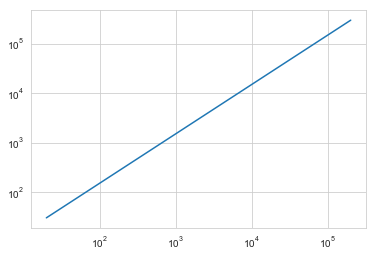

In [36]:
import matplotlib.pyplot as plt
y = [20,200,2000,20000,200000]
z = [30,300,3000,30000,300000]
plt.loglog(y,z)